In [1]:
import math
import matplotlib.pyplot as plt

def binomial_call_option_price(S0, sigma, r, K, T, N, visualize=False):
    """
    Calculate the price of a call option using the binomial tree model.

    Parameters:
    S0 (float): Spot price of the underlying asset
    sigma (float): Annualized volatility of the underlying asset
    r (float): Annualized risk-free interest rate
    K (float): Strike price of the option
    T (float): Time to expiration in years
    N (int): Number of time steps
    visualize (bool): Whether to generate a graphic of the option values

    Returns:
    float: Price of the call option
    """
    # Calculate time step size
    dt = T / N

    # Up and down factors
    u = math.exp(sigma * math.sqrt(dt))
    d = 1 / u

    # Risk-neutral probability
    q = (math.exp(r * dt) - d) / (u - d)

    # Initialize asset prices at maturity
    asset_prices = [S0 * (u**j) * (d**(N - j)) for j in range(N + 1)]

    # Initialize option values at maturity
    option_values = [max(0, price - K) for price in asset_prices]

    # Store option values for visualization
    all_option_values = [option_values.copy()]

    # Backward induction to calculate option price at t = 0
    for i in range(N - 1, -1, -1):
        option_values = [
            math.exp(-r * dt) * (q * option_values[j + 1] + (1 - q) * option_values[j])
            for j in range(i + 1)
        ]
        all_option_values.insert(0, option_values.copy())

    # Visualization of the option value tree
    if visualize:
        plt.figure(figsize=(10, 6))
        for t, values in enumerate(all_option_values):
            plt.scatter([t] * len(values), values, label=f"Step {t}" if t == 0 else "")
        plt.title("Option Values at Each Step in the Binomial Tree")
        plt.xlabel("Time Step")
        plt.ylabel("Option Value")
        plt.grid(True)
        plt.show()

    return option_values[0]


N = 50, Option Price = 14.172482885160866
N = 100, Option Price = 14.20183066094471
N = 150, Option Price = 14.211630354411245
N = 200, Option Price = 14.216533350804387
N = 250, Option Price = 14.21947614921383
N = 300, Option Price = 14.22143843002713
N = 350, Option Price = 14.222840262011319
N = 400, Option Price = 14.223891746718087
N = 450, Option Price = 14.224709633680861
N = 500, Option Price = 14.225363984485588
N = 550, Option Price = 14.225899389656863
N = 600, Option Price = 14.226345579345686
N = 650, Option Price = 14.226723137745008
N = 700, Option Price = 14.227046768911425
N = 750, Option Price = 14.2273272564971
N = 800, Option Price = 14.227572688628117
N = 850, Option Price = 14.227789250656402
N = 900, Option Price = 14.22798175358987
N = 950, Option Price = 14.22815399573857
N = 1000, Option Price = 14.22830901583673
N = 1050, Option Price = 14.228449273874244
N = 1100, Option Price = 14.228576782637118
N = 1150, Option Price = 14.228693204886818
N = 1200, Option

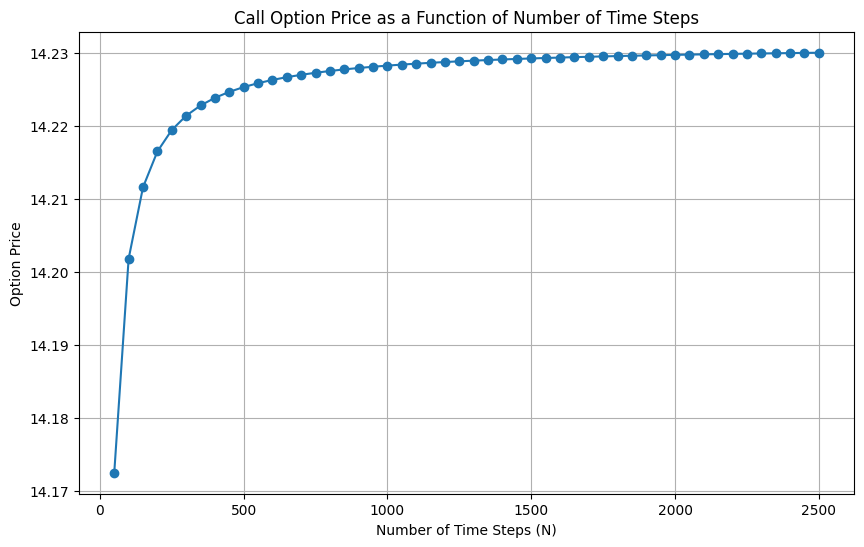

In [3]:
# Parameters for the call option
S0 = 100  # Spot price
sigma = 0.3  # Volatility (30%)
r = 0.05  # Risk-free rate (5%)
K = 100  # Strike price (at-the-money)
T = 1  # Time to expiration (1 year)

# Range of time steps N
N_values = range(50, 2501, 50)

# List to store calculated prices
prices = []

# Test the function for each value of N
for N in N_values:
    price = binomial_call_option_price(S0, sigma, r, K, T, N, visualize=False)
    prices.append(price)
    print(f"N = {N}, Option Price = {price}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(N_values, prices, marker='o')
plt.title("Call Option Price as a Function of Number of Time Steps")
plt.xlabel("Number of Time Steps (N)")
plt.ylabel("Option Price")
plt.grid(True)
plt.show()

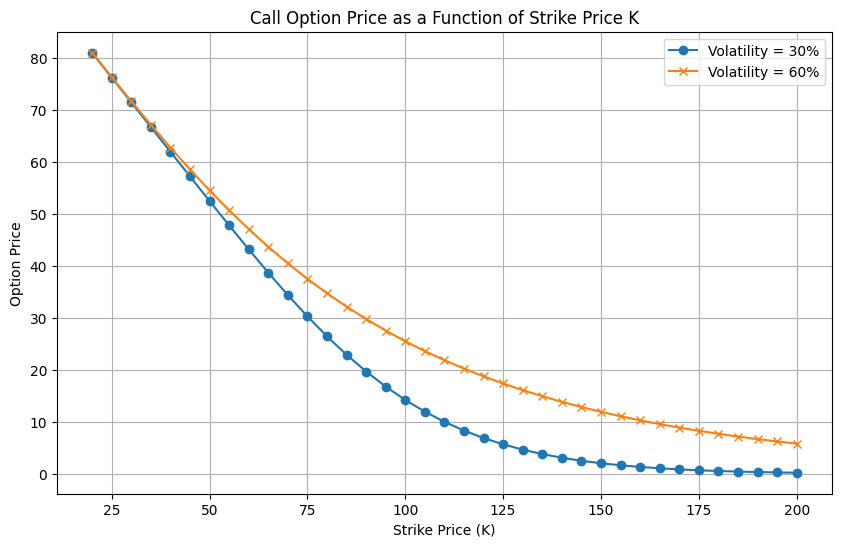

In [4]:
# Parameters for the call option
S0 = 100  # Spot price
r = 0.05  # Risk-free rate (5%)
T = 1  # Time to expiration (1 year)
N = 2500  # Fixed number of time steps

# Range of strike prices K
K_values = range(20, 201, 5)

# List to store calculated prices for each volatility
prices_sigma_30 = []
prices_sigma_60 = []

# Test the function for each value of K with sigma = 30%
sigma = 0.3
for K in K_values:
    price = binomial_call_option_price(S0, sigma, r, K, T, N, visualize=False)
    prices_sigma_30.append(price)

# Test the function for each value of K with sigma = 60%
sigma = 0.6
for K in K_values:
    price = binomial_call_option_price(S0, sigma, r, K, T, N, visualize=False)
    prices_sigma_60.append(price)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(K_values, prices_sigma_30, label="Volatility = 30%", marker='o')
plt.plot(K_values, prices_sigma_60, label="Volatility = 60%", marker='x')
plt.title("Call Option Price as a Function of Strike Price K")
plt.xlabel("Strike Price (K)")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.show()